<a href="https://colab.research.google.com/github/srikanthpurimitla/Tulasi/blob/main/TulasiProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
dataset_path = 'cleaned_ids2018_sampled.csv'  # Update the path accordingly
data = pd.read_csv(dataset_path)

# Display the first few rows
print(data.head())

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum().sum())


   Unnamed: 0  Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0      146275      3389         6        5206015             9            11   
1      512109       443         6       60991608            14            14   
2      807703        53        17          27292             1             1   
3      491912       443         6       70343424            17            20   
4      858679        53        17         137267             2             2   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  ...  \
0             1213             1948              661                0  ...   
1             1211             3396              875                0  ...   
2               45              163               45               45  ...   
3             1118             5653              258                0  ...   
4               94              214               47               47  ...   

   Fwd Seg Size Min    Active Mean     Active Std 

In [4]:
# Fill missing values with the mean (for numerical columns)
data.fillna(data.mean(), inplace=True)


In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Display class mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nLabel Encoding Mapping:", label_mapping)



Label Encoding Mapping: {1.0: 0, 1.6418941411451398: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7, 8.0: 8, 9.0: 9, 10.0: 10}


In [6]:
# Drop non-numeric and redundant columns if needed
data.drop(columns=['Flow ID', 'Timestamp'], errors='ignore', inplace=True)


In [7]:
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = data.drop(columns=['Label'])  # Features
y = data['Label']  # Target variable

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset
# Remove stratify if you have classes with only 1 sample
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# If you still need to stratify, consider oversampling or other techniques to handle imbalanced classes

In [11]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
import numpy as np

# Get probability predictions from both models
svm_probs = svm_model.predict_proba(X_test)
rf_probs = rf_model.predict_proba(X_test)

# Hybrid prediction (Average of both model probabilities)
hybrid_probs = (svm_probs + rf_probs) / 2
hybrid_predictions = np.argmax(hybrid_probs, axis=1)


In [14]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate each model
print("SVM Accuracy:", accuracy_score(y_test, svm_model.predict(X_test)))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_model.predict(X_test)))
print("Hybrid Model Accuracy:", accuracy_score(y_test, hybrid_predictions))

# Display classification report for hybrid model
print("\nClassification Report for Hybrid Model:\n", classification_report(y_test, hybrid_predictions))


SVM Accuracy: 0.971297836938436
Random Forest Accuracy: 0.9979201331114809
Hybrid Model Accuracy: 0.9958402662229617

Classification Report for Hybrid Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1855
           2       1.00      1.00      1.00        76
           3       1.00      1.00      1.00        71
           4       0.98      1.00      0.99       266
           5       1.00      0.99      1.00       120
           6       0.92      1.00      0.96        11
           7       1.00      1.00      1.00         3
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1

    accuracy                           1.00      2404
   macro avg       0.77      0.78      0.77      2404
weighted avg       1.00      1.00      1.00      2404



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


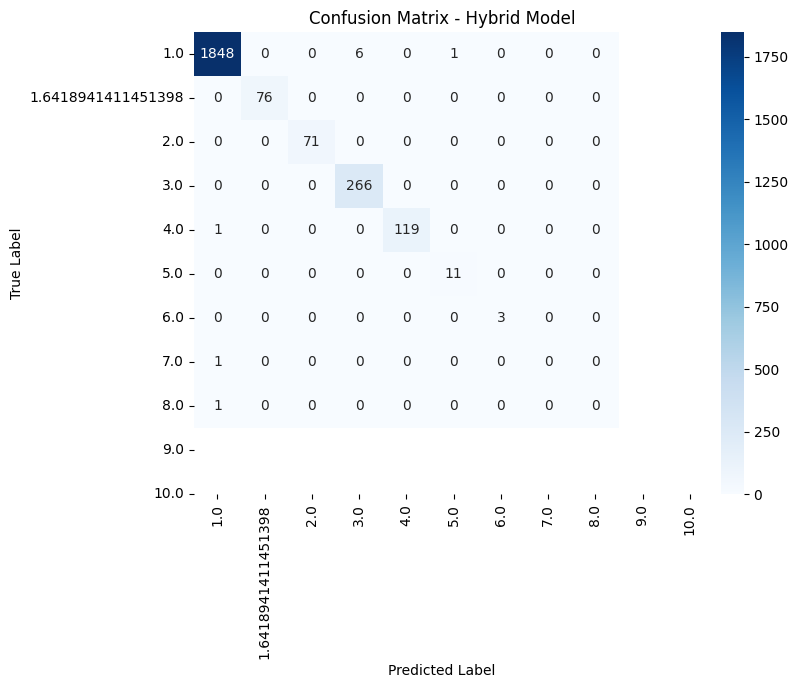

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, hybrid_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Hybrid Model")
plt.show()
